<a href="https://colab.research.google.com/github/RabisaMushtaq/Machine-Learning-Projects/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [ ]:
census=pd.read_csv('/content/adult.csv')

In [ ]:
census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#**PREPROCESSING**

In [ ]:
census.shape

(32561, 15)

In [ ]:
census.replace('?',np.nan,inplace=True)

In [ ]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
census.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
for col in ['workclass','occupation','native.country']:
  census[col].fillna(census[col].mode()[0], inplace=True)

<ipython-input-9-afa09635b938>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census[col].fillna(census[col].mode()[0], inplace=True)


In [ ]:
census.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
census.duplicated().sum()

np.int64(24)

In [ ]:
census = census.drop_duplicates(keep = 'first')
census.shape

(32537, 15)

In [ ]:
census['income'].value_counts()

,count
income,
<=50K,24698
>50K,7839


In [ ]:
def income_code(x):
  if x=='<=50K':
    return 0
  else:
    return 1

In [ ]:
census['income'] = census['income'].apply(income_code)

<ipython-input-15-a9486b4631bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census['income'] = census['income'].apply(income_code)


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


#**EDA**

### **Univariate**

<ipython-input-17-d58bf0d837cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=census, x='workclass', palette='husl')


Text(0.5, 0, 'Workclass')

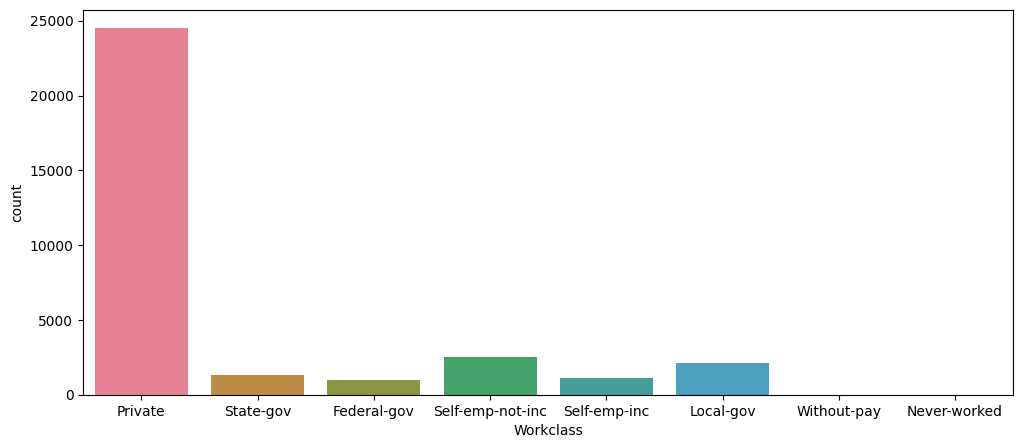

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(data=census, x='workclass', palette='husl')
plt.xlabel('Workclass')

<ipython-input-18-8b1c5b78a336>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=census, x='occupation', palette='viridis')


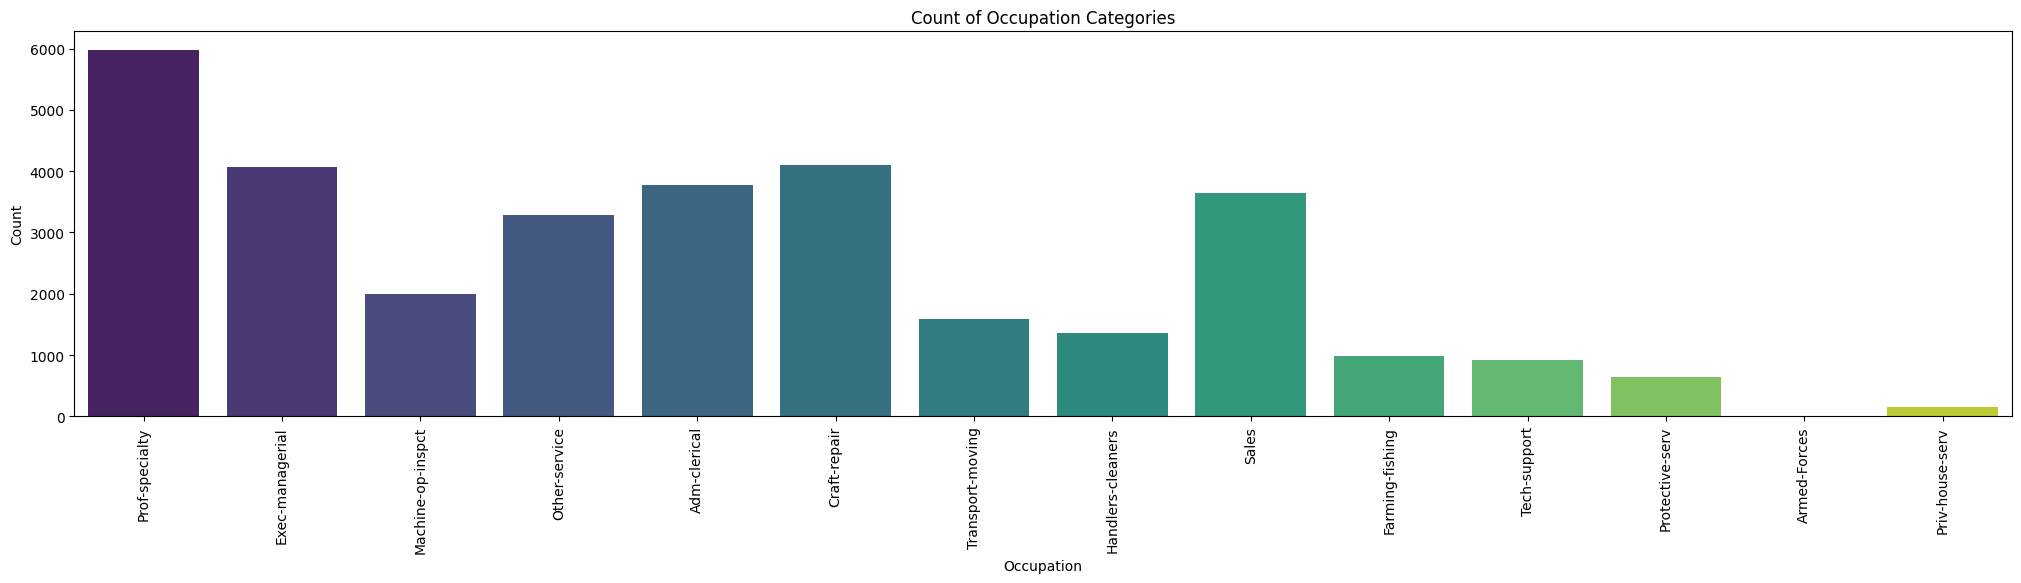

In [ ]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data=census, x='occupation', palette='viridis')
plt.title("Count of Occupation Categories")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<ipython-input-19-57f960f4b413>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=census, x='education', palette='magma')


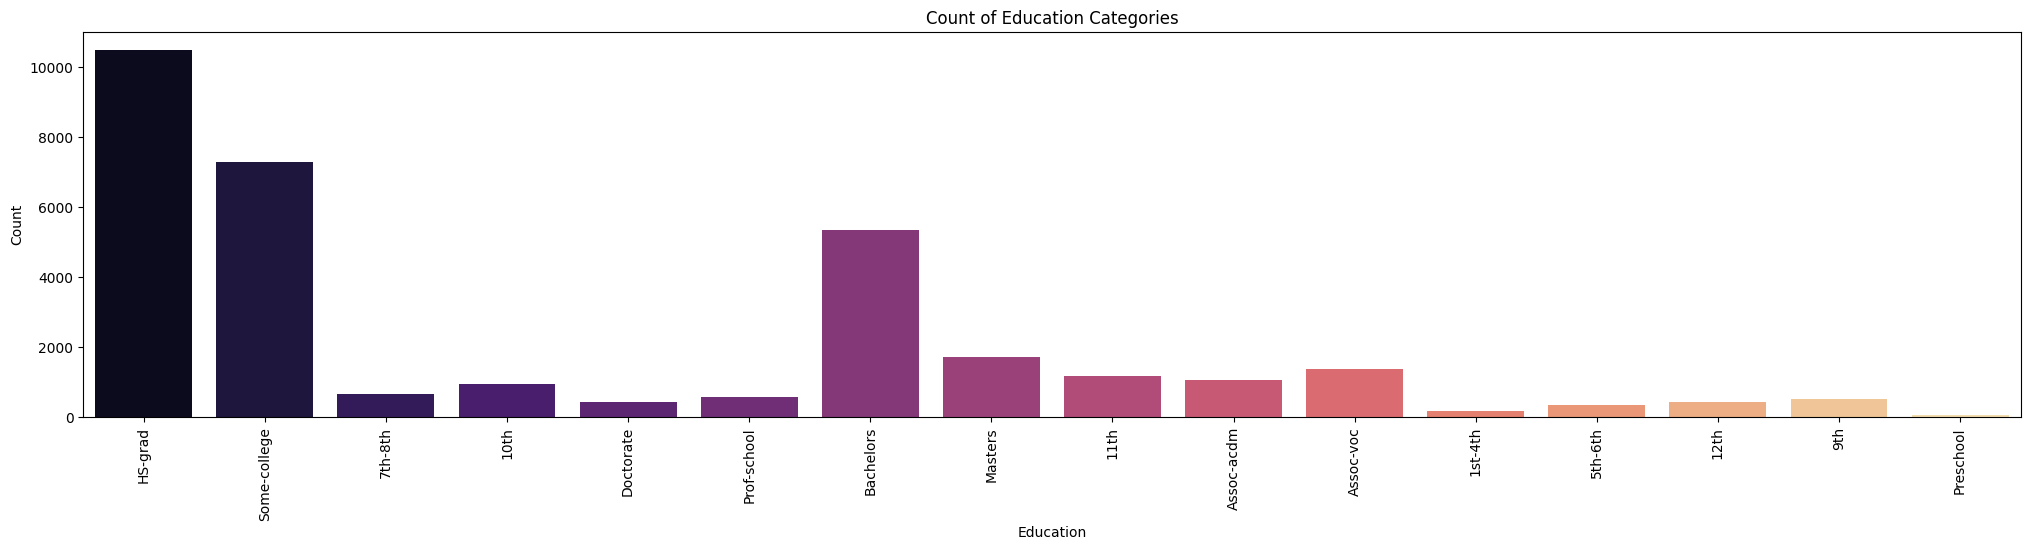

In [ ]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data=census, x='education', palette='magma')
plt.title("Count of Education Categories")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-20-97475580e96d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=census, x='marital.status', palette='crest')


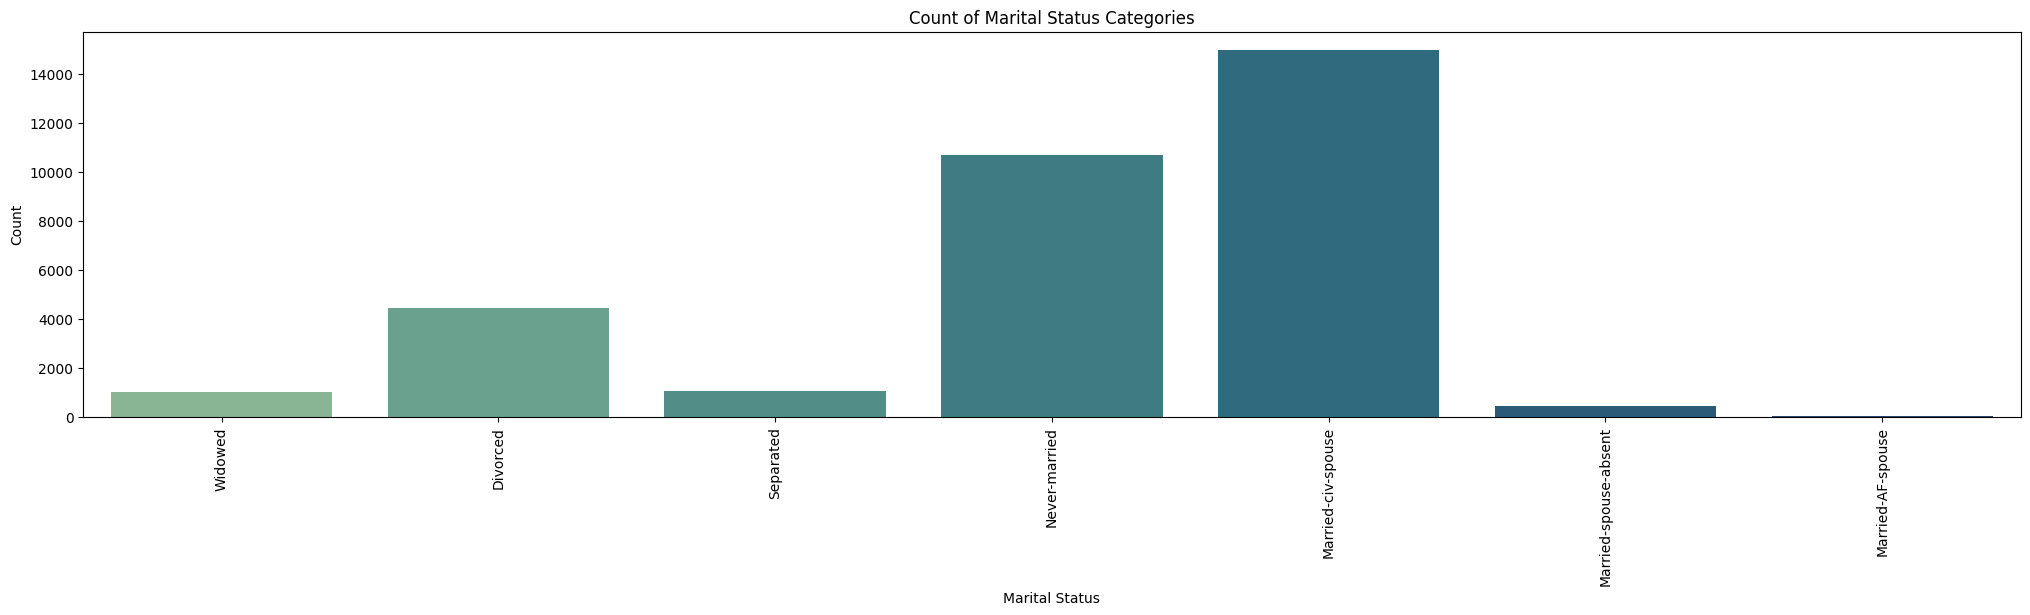

In [ ]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data=census, x='marital.status', palette='crest')
plt.title("Count of Marital Status Categories")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-21-f9129cb608e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=census, x='relationship', palette='flare')


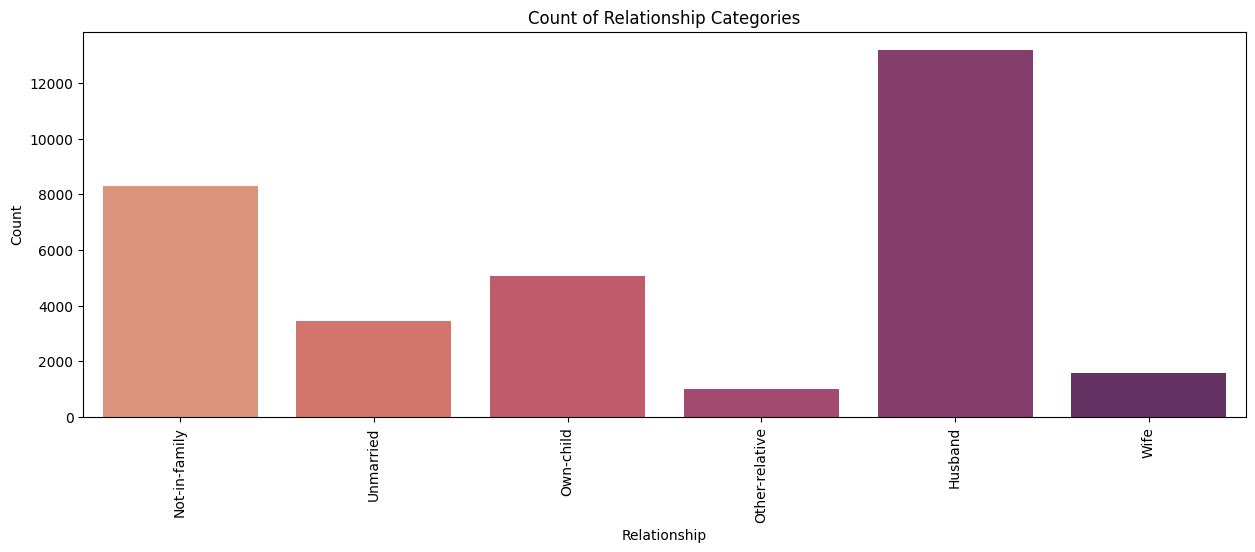

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data=census, x='relationship', palette='flare')
plt.title("Count of Relationship Categories")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-22-6461231bc788>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=census, x='race', palette='viridis')


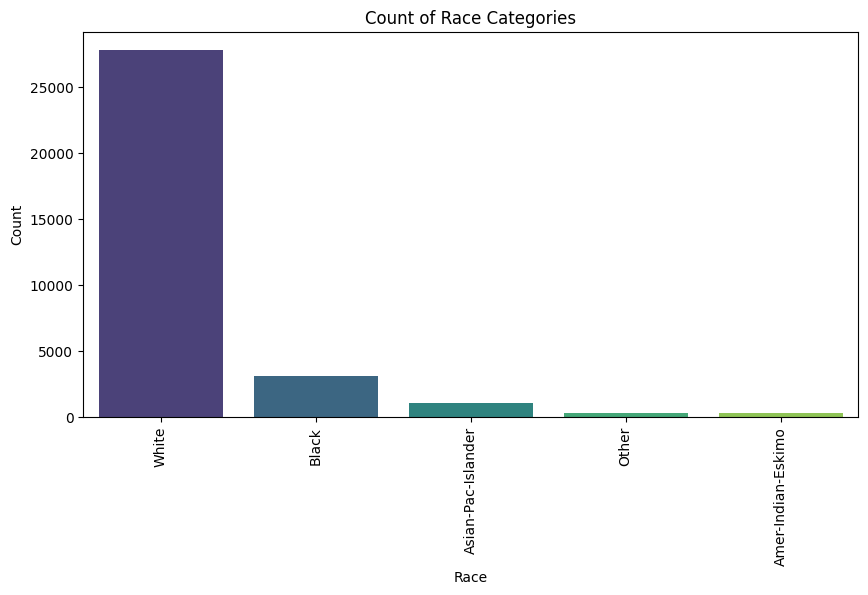

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=census, x='race', palette='viridis')
plt.title("Count of Race Categories")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

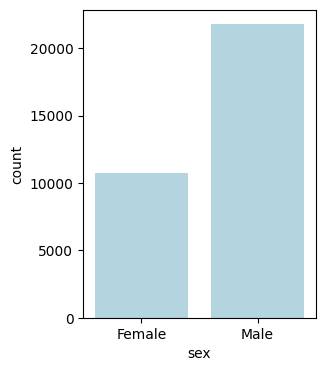

In [ ]:
fig = plt.figure(figsize=(3,4))
sns.countplot(data=census, x='sex', color='lightblue')

<Axes: xlabel='income', ylabel='count'>

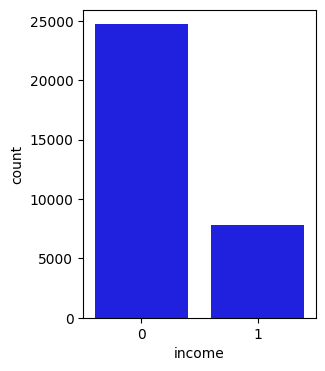

In [ ]:
fig = plt.figure(figsize=(3,4))
sns.countplot(data=census, x='income', color='blue')

In [ ]:
census['native.country'].value_counts().head()

,count
native.country,
United-States,29735
Mexico,639
Philippines,198
Germany,137
Canada,121


From Univariate Analysis, we infer that- 1) Dataset is imbalance 2) Dataset contains most information about United-States while most of the gender observed is of male. 3) We observe the most income is of husband and most of the records have completed HS-Grad 4) Majority of the employee comes from the private workclass.

### **Bivariate**

**Count of Individuals per Education Level (Ordered by Education Rank)**

In [ ]:
edu_mapping = census[['education', 'education.num']].value_counts().reset_index(name='count').sort_values(by='education.num')
edu_mapping

,education,education.num,count
15,Preschool,1,50
14,1st-4th,2,166
13,5th-6th,3,332
8,7th-8th,4,645
10,9th,5,514
7,10th,6,933
5,11th,7,1175
11,12th,8,433
0,HS-grad,9,10494
1,Some-college,10,7282


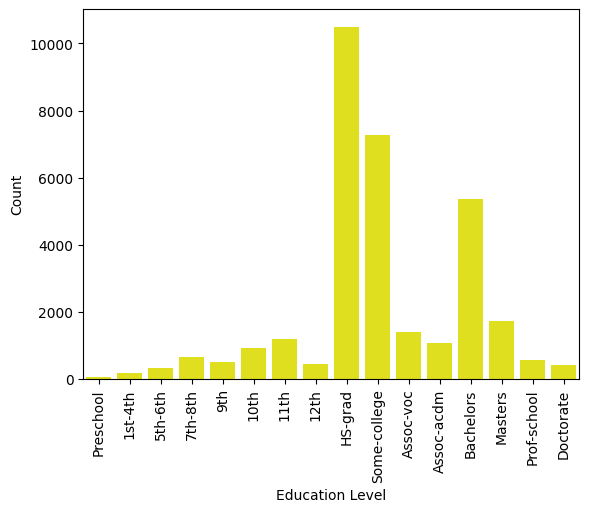

In [ ]:
sns.barplot(data=edu_mapping, x='education',y='count', color='yellow')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

 How does education level affect income?

In [ ]:
edu_inc=census.groupby('education')['income'].mean().sort_values(ascending=False).reset_index()

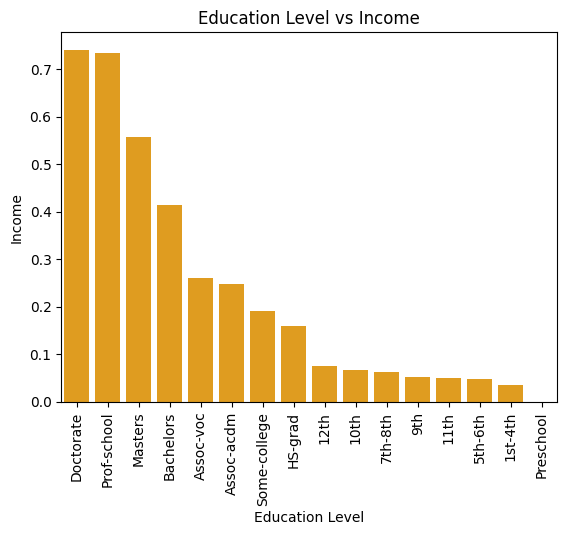

In [ ]:
sns.barplot(data=edu_inc, x='education',y='income', color='orange')
plt.title('Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.show()

<ipython-input-30-168798e445f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x='sex',y='income', palette='viridis')


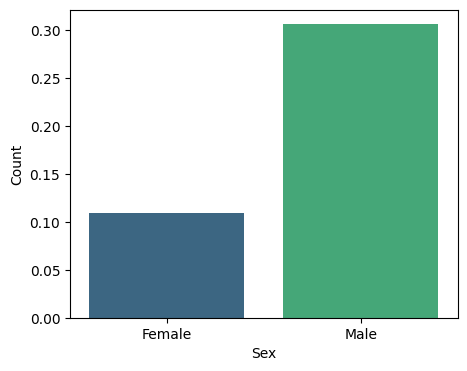

In [ ]:
data1 = census.groupby('sex')['income'].mean().reset_index()
plt.figure(figsize=(5,4))
sns.barplot(data=data1, x='sex',y='income', palette='viridis')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


In [ ]:
data2 = census.groupby(['income', 'occupation']).size().reset_index(name='count')
data2

,income,occupation,count
0,0,Adm-clerical,3261
1,0,Armed-Forces,8
2,0,Craft-repair,3165
3,0,Exec-managerial,2097
4,0,Farming-fishing,877
5,0,Handlers-cleaners,1283
6,0,Machine-op-inspct,1751
7,0,Other-service,3154
8,0,Priv-house-serv,146
9,0,Prof-specialty,3930


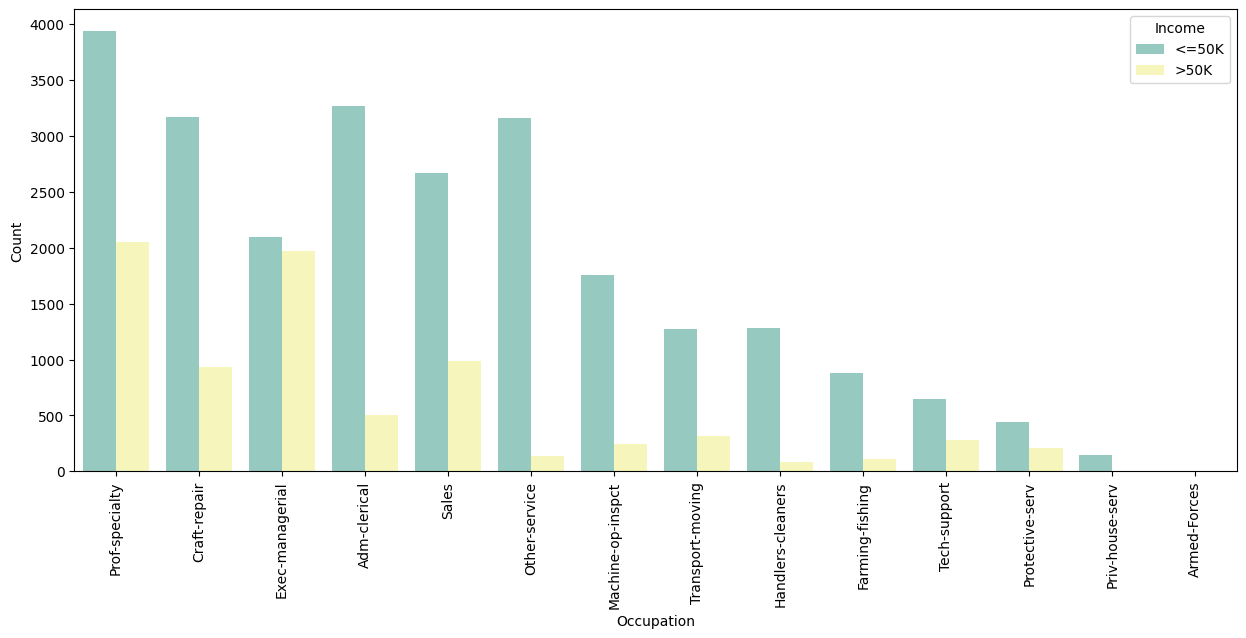

In [ ]:
order = census['occupation'].value_counts().index
plt.figure(figsize=(15,6))
ax=sns.barplot(data=data2, x='occupation',y='count',hue='income', palette='Set3', order=order)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['<=50K', '>50K'], title='Income')
plt.show()

In [ ]:
incomegreater=census[census['income']==1]
incomelesser=census[census['income']==0]

<Axes: xlabel='education', ylabel='count'>

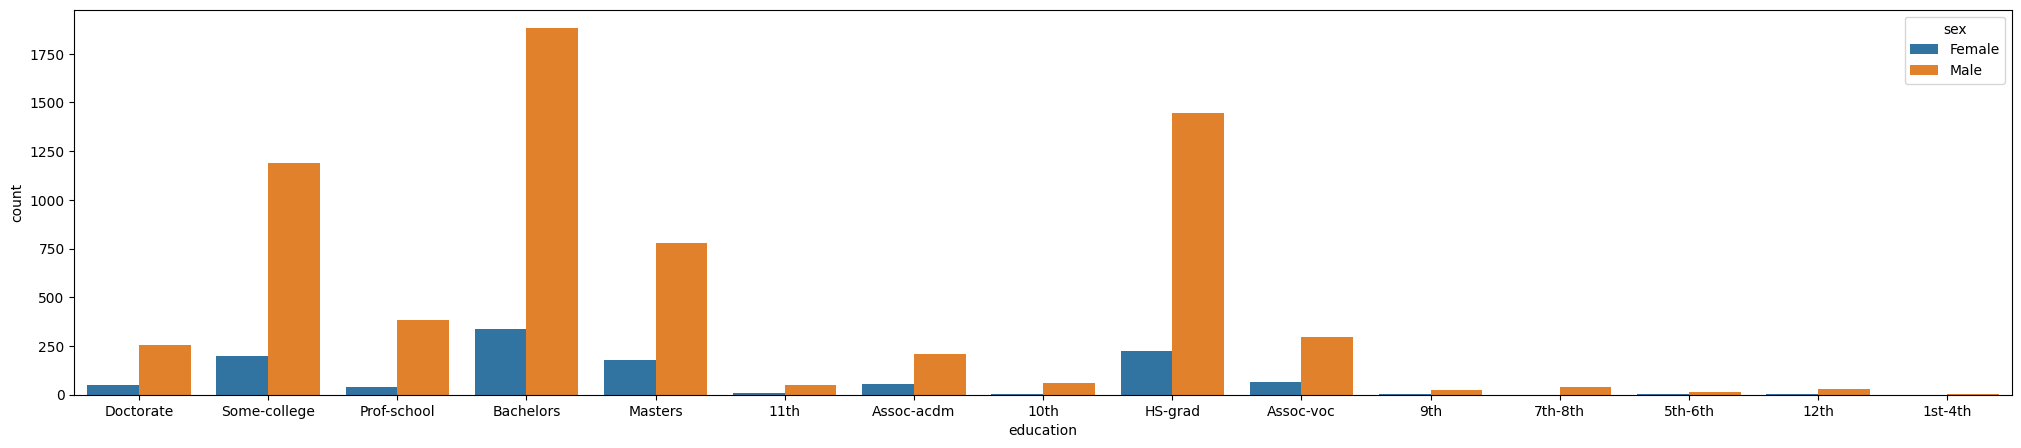

In [ ]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data=incomegreater, x='education',hue ='sex')

In [ ]:
agg=census.groupby('age')['income'].size().reset_index().sort_values(by='age',ascending=False).head(30)


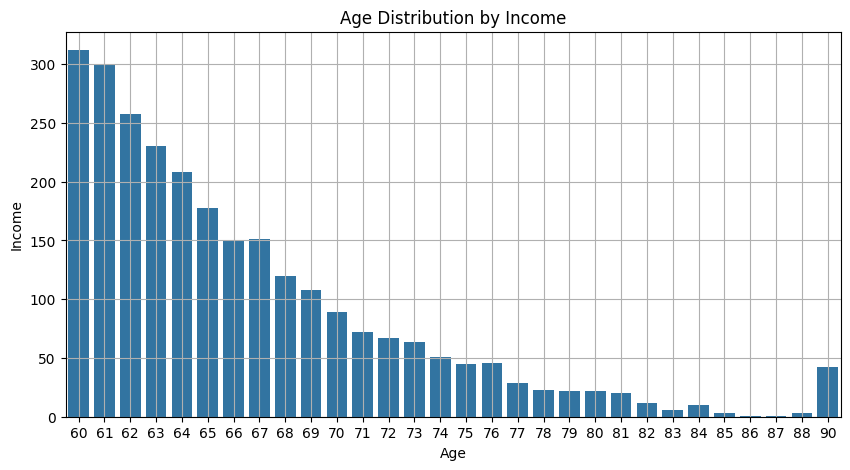

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='age', y='income', data=agg)
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(True)

# **Multi variate**

Text(0.5, 0.98, 'Income by Education Level & Gender')

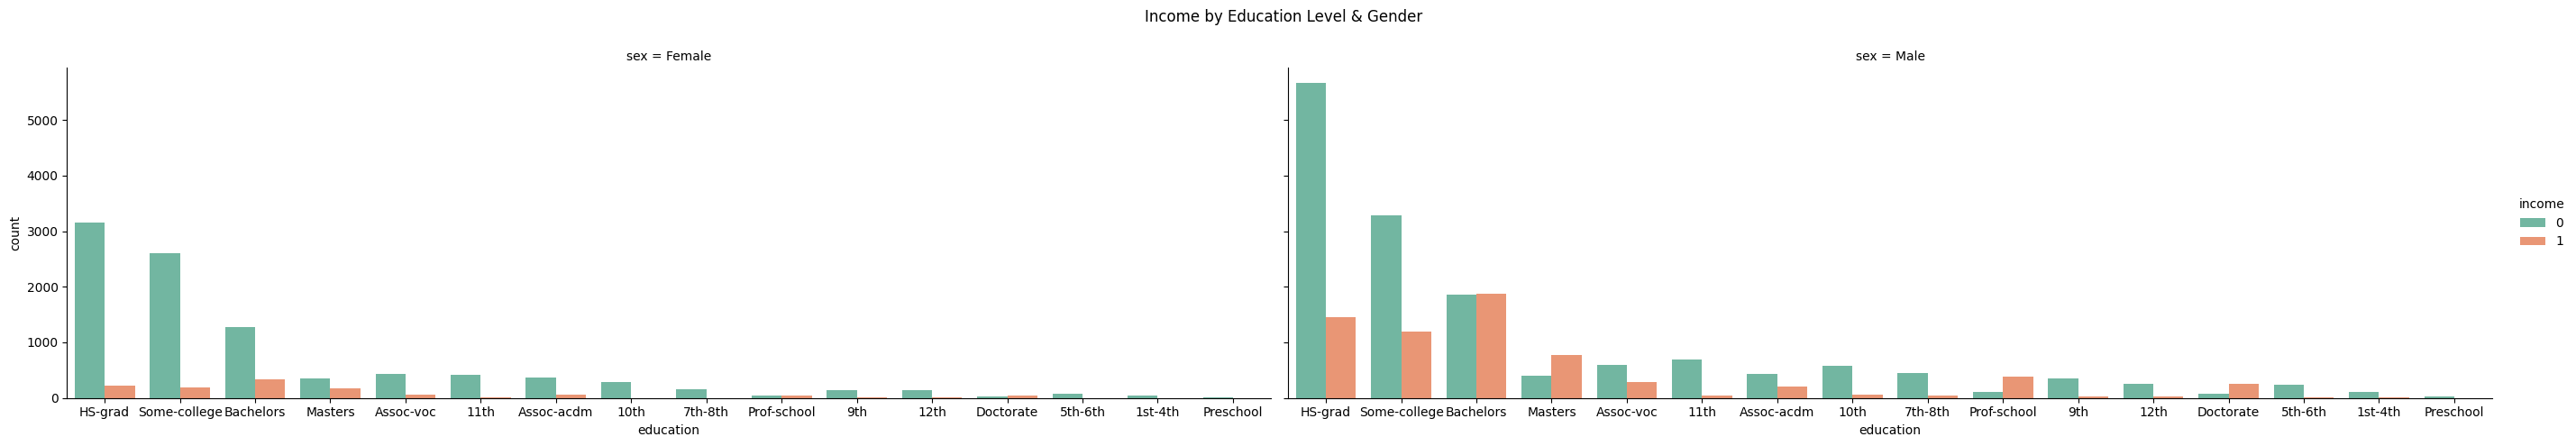

In [ ]:
sns.catplot(data=census, x='education', hue='income', col='sex', kind='count',
            order=census['education'].value_counts().index, palette='Set2', height=5, aspect=2.8)
plt.subplots_adjust(top=0.85)
plt.suptitle('Income by Education Level & Gender')


Text(0.5, 0.98, 'Income by Occupation and Gender')

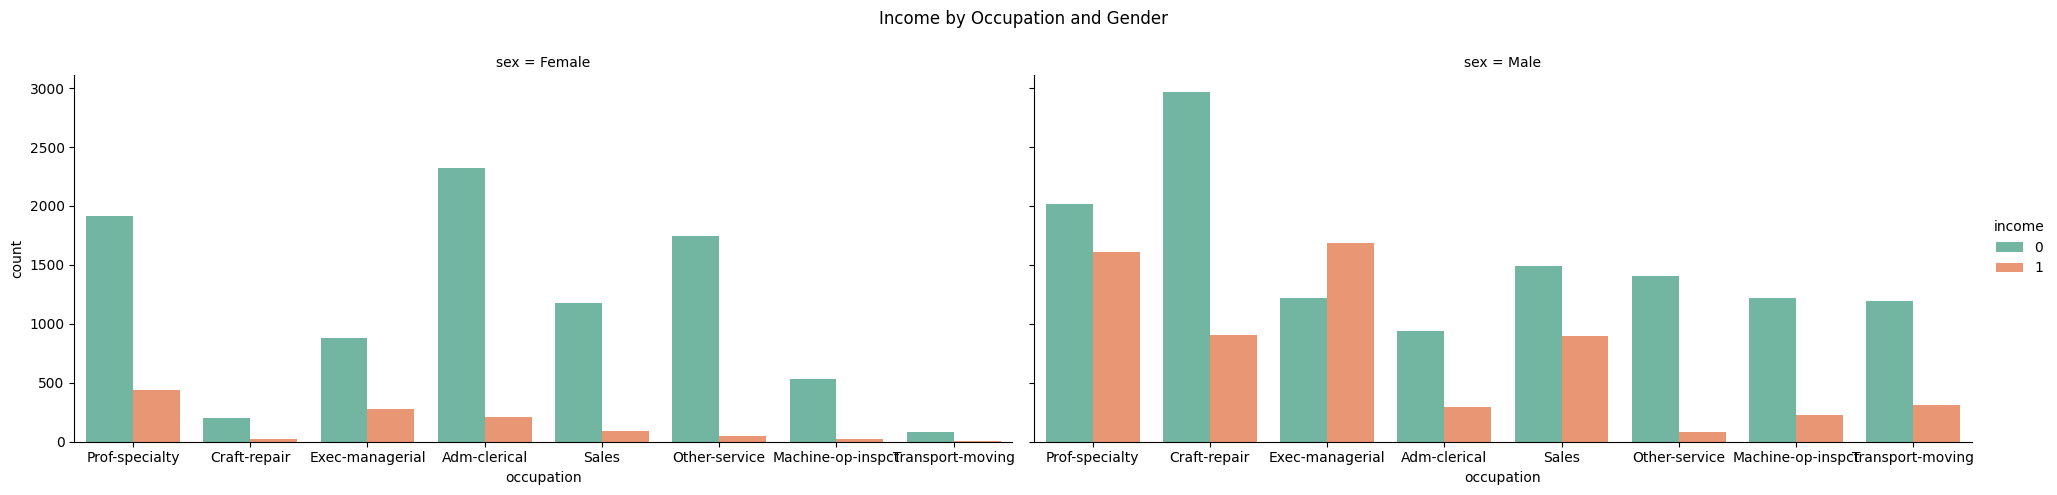

In [ ]:
sns.catplot(data=census, x='occupation', hue='income', col='sex', kind='count',
            order=census['occupation'].value_counts().index[:8], palette='Set2', height=5, aspect=2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Income by Occupation and Gender')


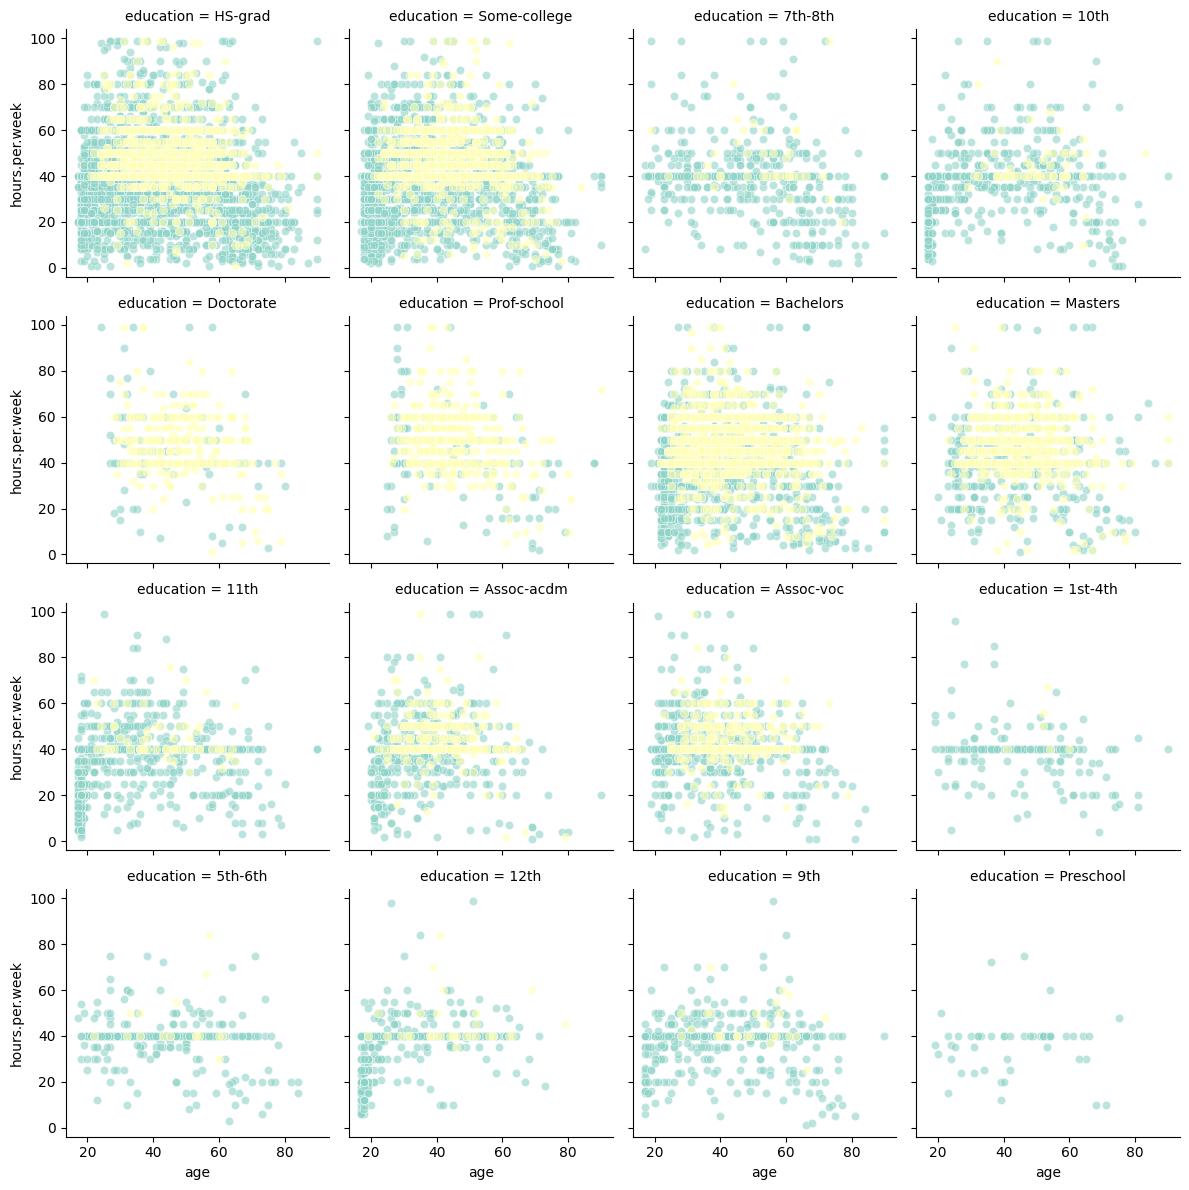

In [ ]:
g = sns.FacetGrid(census, col="education", hue="income", col_wrap=4, palette='Set3')
g.map(sns.scatterplot, "age", "hours.per.week", alpha=0.6)


Age, education, and work hours together influence income — but education is the strongest filter. Even hard-working or older individuals without a degree rarely break the >50K threshold.

#**Feature Engineering**

In [ ]:
census.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
census.loc[:, 'workclass'] = le.fit_transform(census['workclass'])
census.loc[:, 'education'] = le.fit_transform(census['education'])
census.loc[:, 'marital.status'] = le.fit_transform(census['marital.status'])
census.loc[:, 'occupation'] = le.fit_transform(census['occupation'])
census.loc[:, 'relationship'] = le.fit_transform(census['relationship'])
census.loc[:, 'race'] = le.fit_transform(census['race'])
census.loc[:, 'sex'] = le.fit_transform(census['sex'])
census.loc[:, 'native.country'] = le.fit_transform(census['native.country'])

In [ ]:
x = census.drop(['income', 'fnlwgt'], axis=1)
y = census['income']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)

#**Model Training & Testing**

###**LOGISTIC REGRESSION**

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_y_pred_test = log_model.predict(x_test)
log_y_pred_train = log_model.predict(x_train)

print("Train Accuracy (Logistic):", accuracy_score(y_train, log_y_pred_train))
print("Test Accuracy (Logistic):", accuracy_score(y_test, log_y_pred_test))

confusion_log = confusion_matrix(y_test, log_y_pred_test)
report_log = classification_report(y_test, log_y_pred_test)
roc_score_log = roc_auc_score(y_test, log_y_pred_test)

print("\nConfusion Matrix (Logistic):\n", confusion_log)
print("\nClassification Report (Logistic):\n\n", report_log)
print("\nROC-AUC Score (Logistic):", roc_score_log)

Train Accuracy (Logistic): 0.8237734834223366
Test Accuracy (Logistic): 0.8246773202212662

Confusion Matrix (Logistic):
 [[4674  314]
 [ 827  693]]

Classification Report (Logistic):

               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4988
           1       0.69      0.46      0.55      1520

    accuracy                           0.82      6508
   macro avg       0.77      0.70      0.72      6508
weighted avg       0.81      0.82      0.81      6508


ROC-AUC Score (Logistic): 0.6964849850166716


###**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_y_pred_test = rf_model.predict(x_test)
rf_y_pred_train = rf_model.predict(x_train)

print("\nTrain Accuracy (Random Forest):", accuracy_score(y_train, rf_y_pred_train))
print("Test Accuracy (Random Forest):", accuracy_score(y_test, rf_y_pred_test))

confusion_rf = confusion_matrix(y_test, rf_y_pred_test)
report_rf = classification_report(y_test, rf_y_pred_test)
roc_score_rf = roc_auc_score(y_test, rf_y_pred_test)

print("\nConfusion Matrix (Random Forest):\n", confusion_rf)
print("\nClassification Report (Random Forest):\n\n", report_rf)
print("\nROC-AUC Score (Random Forest):", roc_score_rf)


Train Accuracy (Random Forest): 0.9779860924353606
Test Accuracy (Random Forest): 0.8506453595574678

Confusion Matrix (Random Forest):
 [[4574  414]
 [ 558  962]]

Classification Report (Random Forest):

               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4988
           1       0.70      0.63      0.66      1520

    accuracy                           0.85      6508
   macro avg       0.80      0.77      0.78      6508
weighted avg       0.85      0.85      0.85      6508


ROC-AUC Score (Random Forest): 0.7749477693833623


# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(x_train, y_train)
svm_y_pred_test = svm_model.predict(x_test)
svm_y_pred_train = svm_model.predict(x_train)

print("\nTrain Accuracy (SVM):", accuracy_score(y_train, svm_y_pred_train))
print("Test Accuracy (SVM):", accuracy_score(y_test, svm_y_pred_test))

confusion_svm = confusion_matrix(y_test, svm_y_pred_test)
report_svm = classification_report(y_test, svm_y_pred_test)
roc_score_svm = roc_auc_score(y_test, svm_y_pred_test)

print("\nConfusion Matrix (SVM):\n", confusion_svm)
print("\nClassification Report (SVM):\n\n", report_svm)
print("\nROC-AUC Score (SVM):", roc_score_svm)




Train Accuracy (SVM): 0.8548157823965576
Test Accuracy (SVM): 0.8504917025199754

Confusion Matrix (SVM):
 [[4696  292]
 [ 681  839]]

Classification Report (SVM):

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4988
           1       0.74      0.55      0.63      1520

    accuracy                           0.85      6508
   macro avg       0.81      0.75      0.77      6508
weighted avg       0.84      0.85      0.84      6508


ROC-AUC Score (SVM): 0.7467165935086313


In [ ]:
adaboost_model = AdaBoostClassifier(learning_rate=1, n_estimators=199)
adaboost_model.fit(x_train, y_train)

ada_y_pred_test = adaboost_model.predict(x_test)
ada_y_pred_train = adaboost_model.predict(x_train)

print("Train Accuracy (AdaBoost):", accuracy_score(y_train, ada_y_pred_train))
print("Test Accuracy (AdaBoost):", accuracy_score(y_test, ada_y_pred_test))

confusion_ada = confusion_matrix(y_test, ada_y_pred_test)
report_ada = classification_report(y_test, ada_y_pred_test)
roc_score_ada = roc_auc_score(y_test, ada_y_pred_test)

print("\nConfusion Matrix (AdaBoost):\n", confusion_ada)
print("\nClassification Report (AdaBoost):\n", report_ada)
print("\nROC-AUC Score (AdaBoost):", roc_score_ada)

Train Accuracy (AdaBoost): 0.8569672288601176
Test Accuracy (AdaBoost): 0.8578672403196066

Confusion Matrix (AdaBoost):
 [[4691  297]
 [ 628  892]]

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4988
           1       0.75      0.59      0.66      1520

    accuracy                           0.86      6508
   macro avg       0.82      0.76      0.78      6508
weighted avg       0.85      0.86      0.85      6508


ROC-AUC Score (AdaBoost): 0.7636496011480185


#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

dt_y_pred_train = dt_model.predict(x_train)
dt_y_pred_test = dt_model.predict(x_test)

print("Train Accuracy (Decision Tree):", accuracy_score(y_train, dt_y_pred_train))
print("Test Accuracy (Decision Tree):", accuracy_score(y_test, dt_y_pred_test))

confusion_dt = confusion_matrix(y_test, dt_y_pred_test)
report_dt = classification_report(y_test, dt_y_pred_test)
roc_score_dt = roc_auc_score(y_test, dt_y_pred_test)

print("\nConfusion Matrix (Decision Tree):\n", confusion_dt)
print("\nClassification Report (Decision Tree):\n", report_dt)
print("\nROC-AUC Score (Decision Tree):", roc_score_dt)

Train Accuracy (Decision Tree): 0.9780245111222099
Test Accuracy (Decision Tree): 0.8154578979717271

Confusion Matrix (Decision Tree):
 [[4363  625]
 [ 576  944]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4988
           1       0.60      0.62      0.61      1520

    accuracy                           0.82      6508
   macro avg       0.74      0.75      0.75      6508
weighted avg       0.82      0.82      0.82      6508


ROC-AUC Score (Decision Tree): 0.7478759549233953


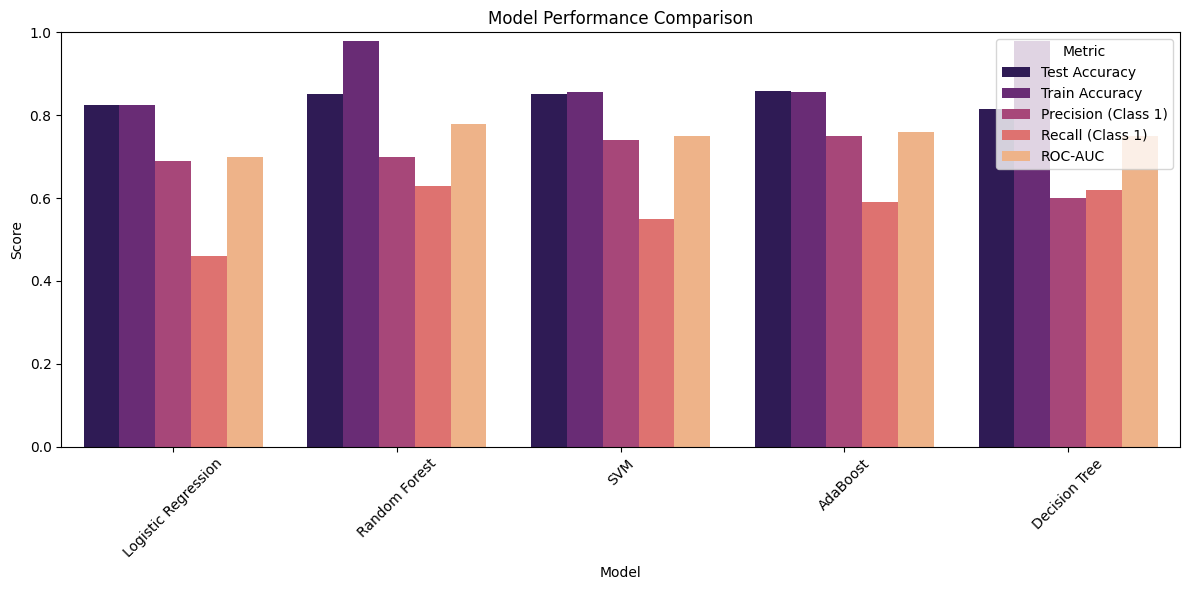

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'Decision Tree'],
    'Test Accuracy': [0.825, 0.852, 0.85, 0.858, 0.815],
    'Train Accuracy': [0.824, 0.978, 0.855, 0.857, 0.978],
    'Precision (Class 1)': [0.69, 0.70, 0.74, 0.75, 0.60],
    'Recall (Class 1)': [0.46, 0.63, 0.55, 0.59, 0.62],
    'ROC-AUC': [0.70, 0.78, 0.75, 0.76, 0.75]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='magma')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Model,Test Accuracy,Train Accuracy,Precision (Class 1),Recall (Class 1),ROC-AUC
0,Logistic Regression,0.825,0.824,0.69,0.46,0.70
1,Random Forest,0.852,0.978,0.70,0.63,0.78
2,SVM,0.850,0.855,0.74,0.55,0.75
3,AdaBoost,0.858,0.857,0.75,0.59,0.76
4,Decision Tree,0.815,0.978,0.60,0.62,0.75


In [ ]:
df.melt(id_vars='Model', var_name='Metric', value_name='Score')

,Model,Metric,Score
0,Logistic Regression,Test Accuracy,0.825
1,Random Forest,Test Accuracy,0.852
2,SVM,Test Accuracy,0.850
3,AdaBoost,Test Accuracy,0.858
4,Decision Tree,Test Accuracy,0.815
5,Logistic Regression,Train Accuracy,0.824
6,Random Forest,Train Accuracy,0.978
7,SVM,Train Accuracy,0.855
8,AdaBoost,Train Accuracy,0.857
9,Decision Tree,Train Accuracy,0.978
